In [11]:
import pandas as pd
from algo import run_nussinov, run_zuker, compare_structures

In [12]:
import pandas as pd

# Load your processed sequences CSV
csv_file = "all_sequences.csv"  # Replace with your actual file path
data = pd.read_csv(csv_file)

# Prepare the sequences as a list of dictionaries
sequences = [{"id": row["id"], "sequence": row["sequence"]} for _, row in data.iterrows()]

print(f"Loaded {len(sequences)} sequences.")

Loaded 50 sequences.


In [13]:
from algo import run_nussinov, run_zuker

# Run Nussinov algorithm
print("Running Nussinov algorithm...")
nussinov_results = run_nussinov(sequences)

# Run Zuker algorithm
print("Running Zuker algorithm...")
zuker_results = run_zuker(sequences)

Running Nussinov algorithm...
Running Zuker algorithm...


In [14]:
from algo import compare_structures

# Combine results and calculate overlap scores
results = []
for nussinov, zuker in zip(nussinov_results, zuker_results):
    overlap_score = compare_structures(nussinov["structure"], zuker["structure"])
    results.append({
        "id": nussinov["id"],
        "sequence": nussinov["sequence"],
        "nussinov_structure": nussinov["structure"],
        "zuker_structure": zuker["structure"],
        "overlap_score": overlap_score,
        "zuker_mfe": zuker.get("mfe", None)
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)

In [15]:
# Display the first few results
print(results_df.head())

# Save results to a CSV
results_df.to_csv("comparison_results.csv", index=False)
print("Results saved to comparison_results.csv.")

                          id  \
0  bpRNA_CRW_34879|Accession   
1  bpRNA_CRW_47678|Accession   
2  bpRNA_CRW_43733|Accession   
3  bpRNA_CRW_41054|Accession   
4  bpRNA_CRW_18252|Accession   

                                            sequence  \
0                      GGCGGAUGUAGCCAAGUGGAUCAAGGCAG   
1                                 GUCAGGAUAGCUCAGUUG   
2  CGCGGGGUAGAGCAGUUGGUAGCUCGCCGGGCUCAUAACCCGGAGG...   
3  GCGUCAUUAGCUCAGUUGGUAGAGCACACGACUUUUAAUCGUGUUG...   
4                             GGGAAGUCCUCGAUGUUGCACC   

                                  nussinov_structure  \
0                      ..(.....(.(((...(.(())).)))))   
1                                 ..((..(((()).).)))   
2  .((.(((..(.(((...((.(.((((((.(((.(.(...(()))))...   
3  ((((((.((...((((((((.((.(((((((...(()))))))).)...   
4                             (((((...((()).))).).))   

                                     zuker_structure  overlap_score  zuker_mfe  
0                      (((.......)))................

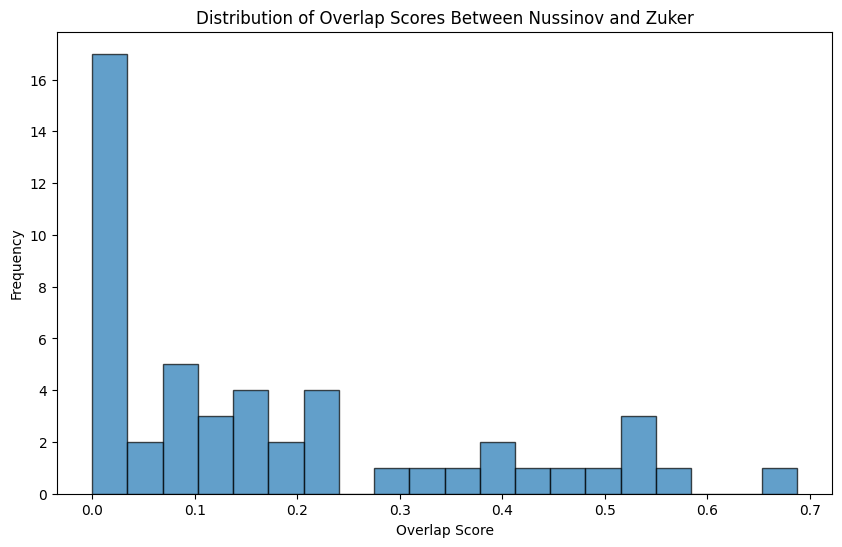

In [16]:
import matplotlib.pyplot as plt

# Plot overlap scores
plt.figure(figsize=(10, 6))
plt.hist(results_df["overlap_score"], bins=20, alpha=0.7, edgecolor="black")
plt.title("Distribution of Overlap Scores Between Nussinov and Zuker")
plt.xlabel("Overlap Score")
plt.ylabel("Frequency")
plt.show()

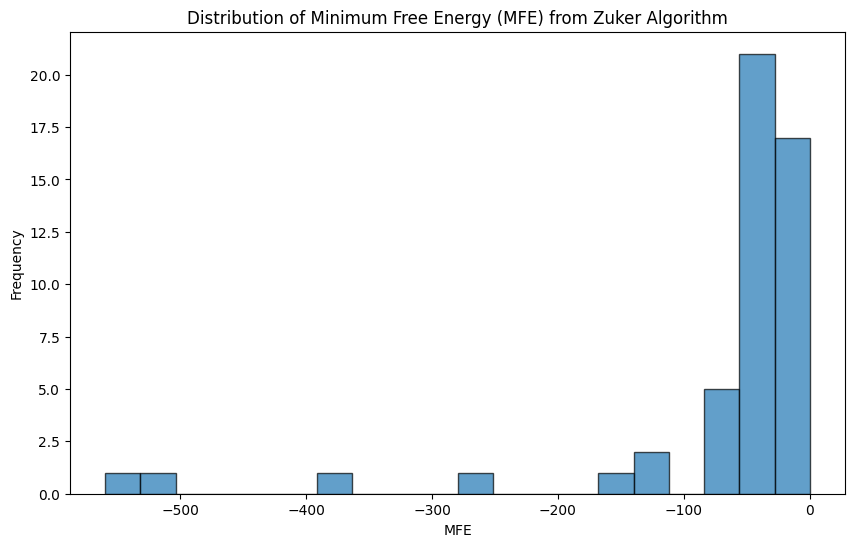

In [17]:
# Plot Zuker MFE values
plt.figure(figsize=(10, 6))
plt.hist(results_df["zuker_mfe"].dropna(), bins=20, alpha=0.7, edgecolor="black")
plt.title("Distribution of Minimum Free Energy (MFE) from Zuker Algorithm")
plt.xlabel("MFE")
plt.ylabel("Frequency")
plt.show()